Zero Point: -0.008461538461538467
Dispersion: 0.19441613393979082


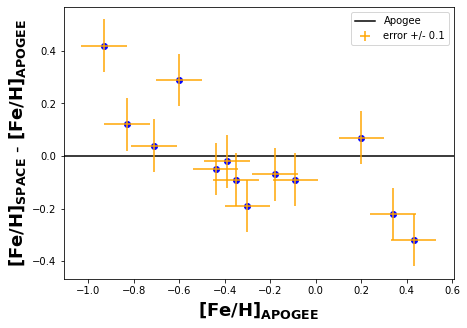

In [1]:
import sys
import os, os.path
import numpy as np
import matplotlib.pyplot as plt
import csv
from scipy.stats import kde
import pandas as pd

myfile = pd.read_csv('/home/smu/Carlos/SPACE/apogee_results/apogee_space_control.out', comment='#', delimiter = ',')

Name_SPACE = myfile['Spectra_name']
FeH_SPACE = myfile['Fe']
#Teff_SPACE = myfile['Teff']
#logg_SPACE = myfile['logg']

ap_stds = pd.read_csv('/home/smu/Carlos/APOGEE_STDS/stds_durin.dat', comment='#', delimiter= ',')

Name_ap = ap_stds['Spectra_name']
FeH_ap = ap_stds['FE_H']
#Teff_ap = ap_stds['Teff']
#logg_ap = ap_stds['logg']
#SiFe_ap = ap_stds['SiFe']
#MgFe_ap = ap_stds['MgFe']


FeDiff=[]
FeTrue=[]

for i in range(0, len(myfile)):
    if Name_SPACE[i] == Name_ap[i]:
        FeDiff.append(FeH_SPACE[i] - FeH_ap[i])
        FeTrue.append(FeH_ap[i])

        Fe_avgdiff = np.mean(FeDiff)
        Fe_avediffstd = np.std(FeDiff)
                
print('Zero Point: ' + str(Fe_avgdiff) + '\nDispersion: ' + str(Fe_avediffstd))

fig = plt.figure(figsize = (7,5))
plt.plot(FeTrue, FeDiff, ".", markersize=12, color = 'blue')
plt.xlabel(r"$\bf[Fe/H]_{APOGEE}$", fontsize = 18)
plt.ylabel(r"$\bf[Fe/H]_{SPACE}$ - $\bf[Fe/H]_{APOGEE}$", fontsize = 18)
plt.axhline(y=0, color='k', linestyle = '-', label = 'Apogee')
plt.errorbar(FeTrue, FeDiff, yerr = 0.1, xerr = 0.1, fmt='None', color = 'orange', label = 'error +/- 0.1')
plt.legend()
#plt.show()
plt.savefig('calibration_stars.jpg')
